# Sample Analysis of Crime Data - Seattle#

In [157]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [63]:
# Read Seattle data
filepath = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv"
seattle_df = pd.read_csv(filepath)

In [64]:
# Sample input
seattle_df.head(2)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014


**Question: Does number of crimes change by month?**

Answer: No. In Seattle, the total number of crimes per month is nearly equal in Summer 2014. 
On the figure below, we observe that on June(6), July(7) and August(8), the number of crimes is 
around 11000 for each month.

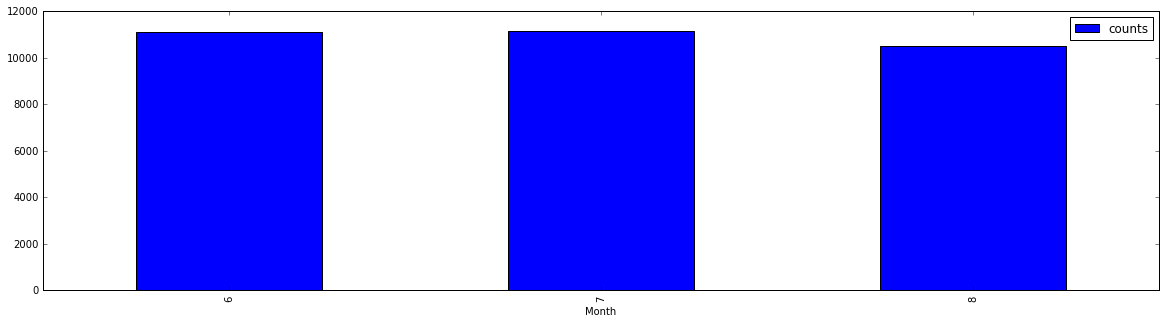

In [84]:
# Question: Does number of crimes change by month?
month_counts_df = pd.DataFrame(seattle_df.groupby("Month").size().rename('counts'))
month_counts_df.plot(kind='bar', figsize=(20, 5))
plt.show()


# Answer: No. In Seattle, the total number of crimes per month is nearly equal in Summer 2014. 
# On the figure below, we observe that on June(6), July(7) and August(8), the number of crimes is 
# around 11000 for each month.

**Question: Which (summarized) offense types are more common?**

Answer: In Seattle-Summer 2014, Car Prowl is observed far more often than other offenses. 
The top-10 offenses can be seen on the figure below.

/Users/mgulcin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


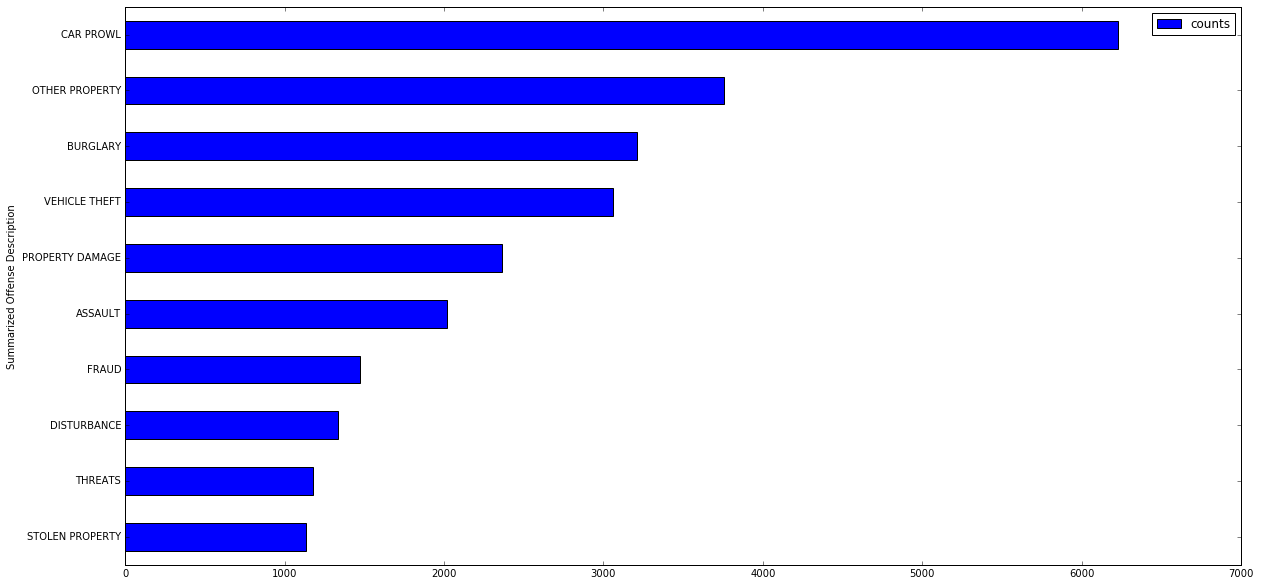

In [110]:
# Question: Which (summarized) offense types are more common?
offense_type_counts_df = pd.DataFrame(seattle_df.groupby(["Summarized Offense Description"]).size().rename('counts'))
offense_type_counts_df = offense_type_counts_df.reset_index()
sorted_offense_type_counts_df = offense_type_counts_df.sort('counts', ascending=False)
k= 10
top_k_offense_type_counts_df = sorted_offense_type_counts_df.head(k)
ax = top_k_offense_type_counts_df.plot(kind="barh" , x="Summarized Offense Description", y="counts", figsize=(20, 10))
ax.invert_yaxis()
plt.show()

# Answer: In Seattle-Summer 2014, Car Prowl is observed far more often than other offenses. 
# The top-10 offenses can be seen on the figure below.

** Question: How did the count of top-10 offenses change by Month?**

Answer: Mostly, the count of offenses in top-10 remained same, except Vehicle Theft. Its count is 
reduced from ~1200 to ~800 from June to August.

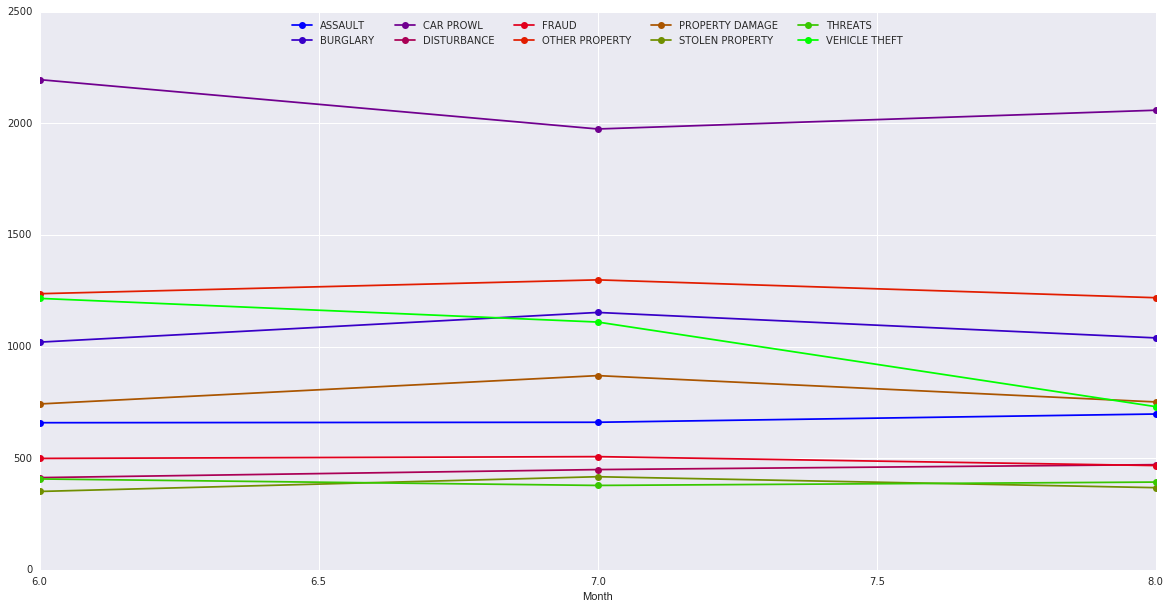

In [182]:
# Question: How did the count of top-10 offenses change by Month?
top_10_offenses = top_k_offense_type_counts_df["Summarized Offense Description"].values
selected_seattle_df = seattle_df[seattle_df["Summarized Offense Description"].isin(top_10_offenses)]

offense_type_month_counts_df = pd.DataFrame(selected_seattle_df.groupby(["Summarized Offense Description", "Month"]).size().rename('counts'))
offense_type_month_counts_df = offense_type_month_counts_df.reset_index()

fig, ax = plt.subplots()
grouped = offense_type_month_counts_df.groupby('Summarized Offense Description')
colors = iter(cm.brg(np.linspace(0, 1, len(grouped))))
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Month', marker="o", y='counts', label=key, figsize=(20,10), color=next(colors))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=5, fancybox=True, shadow=True)
plt.show()


# Answer: Mostly, the count of offenses in top-10 remained same, except Vehicle Theft. Its count is 
# reduced from ~1200 to ~800 from June to August.

**Question: Does number of crimes change by District/Sector?**

Answer: Some districts have higher number of crimes than others. However from the data we cannot 
understand the mapping of distict keyword (the character) to the name of the neighboorhood, which makes the analysis
harder to understand.

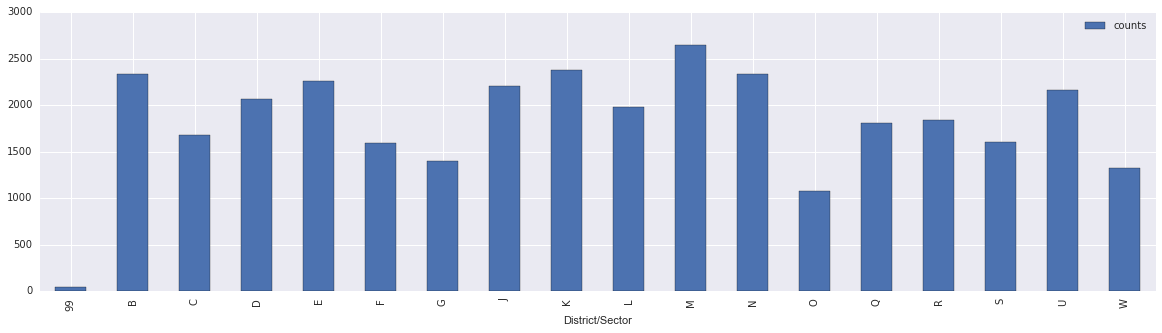

In [184]:
# Question: Does number of crimes change by District/Sector?
month_counts_df = pd.DataFrame(seattle_df.groupby("District/Sector").size().rename('counts'))
month_counts_df.plot(kind='bar', figsize=(20, 5))
plt.show()


# Answer: Some districts have higher number of crimes than others. However from the data we cannot 
# understand the mapping of distict keyword (the character) to the name of the neighboorhood, which makes the analysis
# harder to understand.